In [1]:
# =============================Task1==============================
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
text_columns = ["CustomerID","Gender"]

# dropping the unwated columns and dropping duplicated
df = df.drop(text_columns, axis=1)
df = df.drop_duplicates()

# filling the missing value with mean value
imputer = SimpleImputer(strategy = "mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select features (assuming 'age', 'income', 'spending_score' are relevant)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)

# # Add cluster labels to the original dataset
# data['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Getting the labels assigned to each data point
labels = kmeans.labels_
print("\nLabels:")
print(labels)


Centroids:
[[ 0.98741604 -0.55298099 -0.42186096]
 [ 0.03720536  0.99011499 -1.18875705]
 [-0.74780119  0.0057131   0.7987223 ]]

Labels:
[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 1 2 2 2 0 0 0 0 2 1 2 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


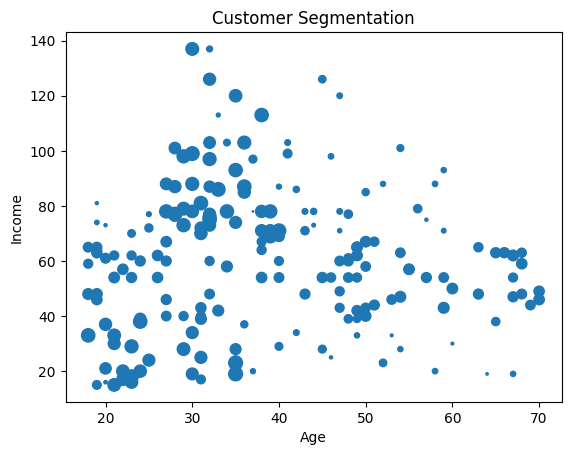

In [3]:
# Plotting the clusters
plt.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

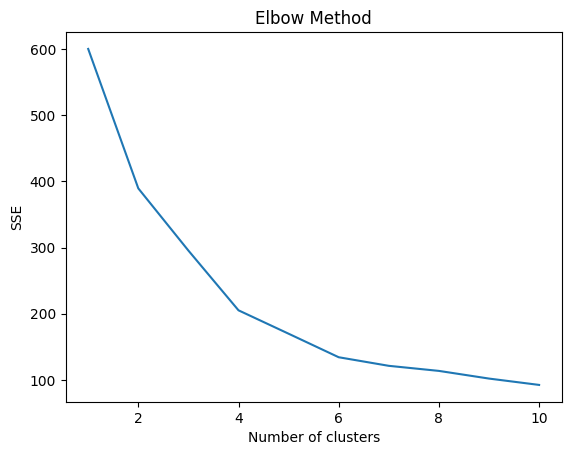

In [5]:
# ===========Task2===========================
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(scaled_features)

In [8]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1], dtype=int32)